In [16]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from utilities import visualize_classifier

In [17]:
#load input data
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=",")
X, Y = data[:, :-1], data[:, -1]

In [18]:
class_0 = np.array(X[Y==0])
class_1 = np.array(X[Y==1])

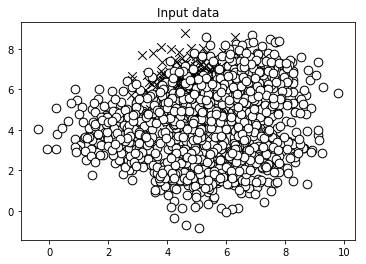

In [19]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], s=75, facecolors="black", edgecolors="black", linewidth=1, marker="x")
plt.scatter(class_1[:,0], class_1[:,1], s=75, facecolors="white", edgecolors="black", linewidth=1, marker="o")
plt.title("Input data")
plt.show()

In [29]:
#split into training and test set
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.25, random_state=5)

In [38]:
#parameter setting
params = {'n_estimators':100, 'max_depth':4, 'random_state':0}

In [34]:
flag = "balance"
if flag == "balance" : 
    params = {'n_estimators':100, 'max_depth':4, 'random_state':0, 'class_weight':'balanced'}
else : 
    raise TypeError("Invalid input argument; should be 'balance'")

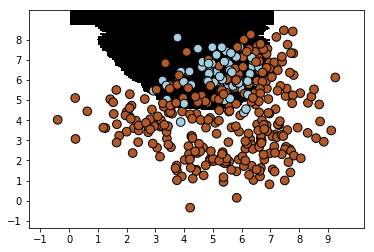

In [35]:
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, Y_train)
visualize_classifier(classifier, X_test, Y_test)

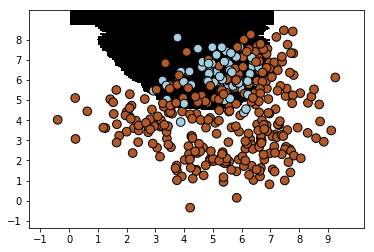

In [36]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, Y_test)

In [37]:
#evaluating performance
#evaluating classifier
class_names = ['Class-0', 'Class-1']
print("n"+"#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(Y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(Y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")
plt.show()

n########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.44      0.93      0.60       181
    Class-1       0.98      0.77      0.86       944

avg / total       0.89      0.80      0.82      1125

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.45      0.94      0.61        69
    Class-1       0.98      0.74      0.84       306

avg / total       0.88      0.78      0.80       375

########################################

